In [1]:
#import emoji
#https://emojipedia.org/hospital/

![](https://www.verywellhealth.com/thmb/zUy-ztfhAmTBtYjJsNcC_admX0g=/2121x1414/filters:no_upscale():max_bytes(150000):strip_icc()/medical-representative-man-meeting-with-a-female-doctor-at-a-hospital-reception-desk-1133005874-da6a08af4b294993820ff2d43a7e55a8.jpg)


<h2 style="font-size:45px;font-family:serif;text-align:center;">🏥<strong style="color:Green;font-size:40px;font-family:serif;">Ohio Clinic - Meeting Suppy and Demand</strong>🏥</h2>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;"> This case study is based on the trouble proposed by Dr. Judy, a pediatric surgeon and clinic supervisor at Ohio Clinic, facing clinic losses for the third consecutive year. Dr. Judy had recently been promoted to this position, but she knew for a fact that the clinic had been doing due diligence in terms of efficiency. What surprised her most was that the hospital was incurring losses despite having the finest doctors available and no lack of scheduled appointments.<b>Ohio Clinic is a nonprofit medical center in Ohio. The clinic operates with a unique mission of blending research and education with clinical and hospital care. The medical center has a huge head force of 50,000 employees, and as a result of the combined effort of those employees, the medical center has been able to handle approximately 7 million visits so far.</b>
<h2 style="color:Green;font-size:45px;font-family:serif;text-align:center;"><strong style="color:Green;font-size:40px;font-family:serif;">Understanding the Business Problem</strong></h2>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">
Previously, in situations like these, the hospital relied on an influx of capital from donors. However, with the recent change in management, efforts had been commenced to make the medical center self-sustainable. If finances have no flaws, appointments are skyrocketing, no considerable hiring, or raises have taken place, then the only reason for this dilemma could be that patients are not showing up after getting the appointments in the first place.Thereby,the entire analysis would be revolving around these reasons.

<h2 style="color:#AB63FA;font-size:45px;font-family:serif;text-align:center;"><strong style="color:Green;font-size:40px;font-family:serif;">AIM 🎯</strong></h2>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">
1. Discover reasons that <b>losses are coming up even though the rate of appointments is going up</b>?
2. If patients are not reporting at the time of their scheduled appointments, come up with<b> a method to determine whether a patient would show up on the basis of his/her characteristics</b>. 
I believed that knowing which patients were likely not to show up would enable the hospital to take countermeasures like the following:
•Provide constant appointment reminders and confirmations
•Make the head count of doctors and hospital staff in line with the demand at hand</p>

### Let's start⏳ the analysis📝
## Importing Packages

In [69]:
# importing packages 

%matplotlib inline

import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)....
import matplotlib.pyplot as plt #Data Vizualization
import matplotlib.image as mpimg
from IPython.display import Image
from matplotlib.pylab import rcParams
import seaborn as sb

#time related conversions
from time import time
import calendar
from calendar import weekday
import datetime

#machine learning useful packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix , f1_score , recall_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import kernel_approximation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier 
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15,5 # default 6.4 x 4.8

## Feature Exploration

In [3]:
# reading dataset
data = pd.read_csv("KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Dictionary

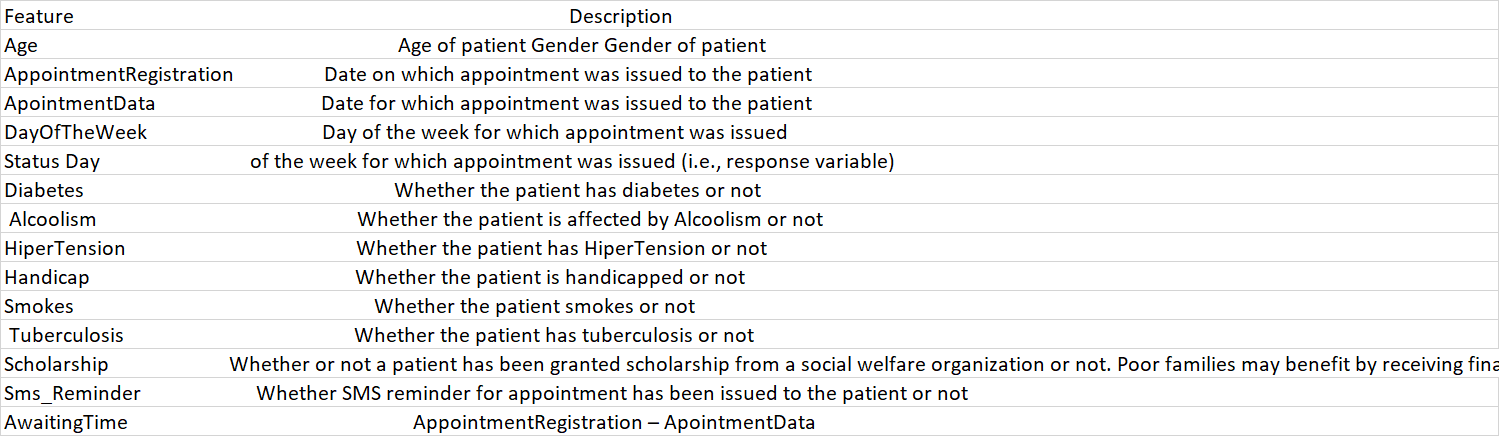

In [4]:
print(len(data))
# renaming columns and making schedule day and appointment day to general date_time format
data.rename({'Hipertension' : 'Hypertension','Handcap' : 'Handicap' , 'No-show' : 'Status'},axis = 1 , inplace = True)
data.head()

110527


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# printing the distinct values for each set of features
for column in list(data.columns):
    print("{0:25} {1}".format(column,data[column].nunique()))

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hypertension              2
Diabetes                  2
Alcoholism                2
Handicap                  5
SMS_received              2
Status                    2


In [6]:
#plot all features in the dataset
def features_plots(discrete_vars) :
    plt.figure(figsize = (15,24.5))
    
    # continous variables
    for i,cv in enumerate(['Age']) :
        plt.subplot(7,1,i+1)
        plt.hist(data[cv] , bins = len(data[cv].unique()) , color = 'purple')
        plt.title(cv)
        plt.ylabel('Frequency')
        
    # discrete variables
    for i,dv in enumerate(discrete_vars) :
        plt.subplot(7,2,i+3)
        data[dv].value_counts().plot(kind = 'bar' , title = dv , color = 'pink')
        plt.ylabel('Frequency')

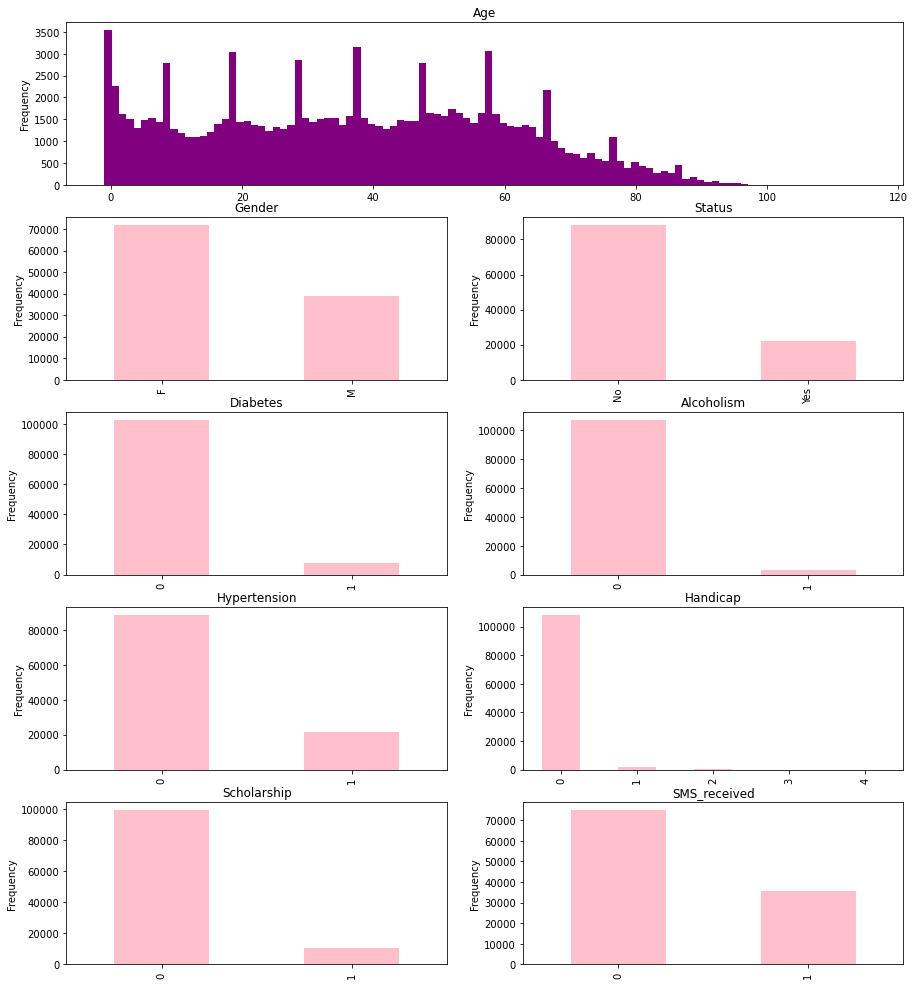

In [7]:
discrete_vars = ['Gender' , 'Status' , 'Diabetes' , 'Alcoholism' , 'Hypertension' , 'Handicap' , 'Scholarship' ,'SMS_received']
features_plots(discrete_vars)

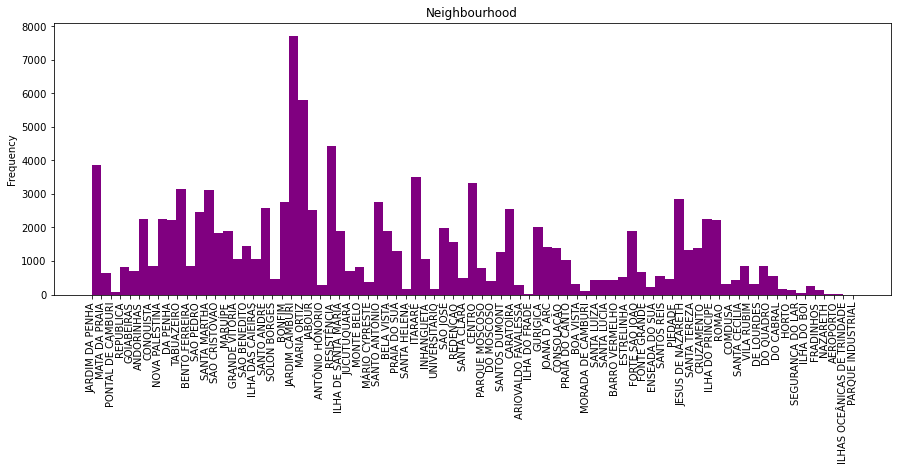

In [8]:
# exploring feature neighbourhood 
for i,cv in enumerate(['Neighbourhood']) :
        plt.subplot(1,1,i+1)
        plt.hist(data[cv] , bins = len(data[cv].unique()) , color = 'purple')
        plt.title(cv)
        plt.ylabel('Frequency')
        plt.xticks(rotation = 90)
        
        plt.show()

## Inference from Plots

1> Age lies in the range between -2 and 90.But,isn't this surprising that age being a discrete positive integer is                negative,how is this possible? This signifies that there is some noise in the given dataset and data must be cleaned in        order to use it for further analysis.

2> Handicap is a boolean variable and its value must be either 0 or 1 but here the range given is from 0 to 4.

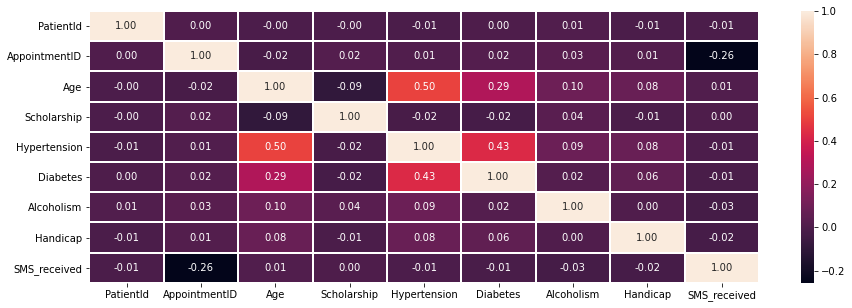

In [9]:
# correlation between various features in the dataset(diabetes and hypertension:poster)
sb.heatmap(data.corr(),annot=True,linewidths=1,fmt='0.2f')

## Data Wrangling

In [10]:
# frequency of observations having negative age groups 
data[data['Age'] < 0]['Age'].value_counts().sum()

1

In [11]:
# as it indicated only one observation to be negative so we may remove that observation and it won't then hinder our results
# removing
data = data[data['Age']>=0]
# next is the handicap column since its range is between 0 and 4 and we may say the dataset presented in this column considers 
# the number of times the patient has been handicapped but yes it is just an assumption so removing this column in order to 
# fix the dataset for analysis
del data['Handicap']

Now we move to our last plot that is neighbourhood ,although it is giving us a great plot but yes we may infer from the graph that the frequently written neighbour name and that we may assume that he/she is a satisfied patient and may have recommended his/her neighbour for the clinic services but this is absolutely an assumption and this information will not help us to remind our patients to reach the clinic at their appointment dates
thereby,we may also remove this column.

In [12]:
# removing neighbourhood column
del data['Neighbourhood']

In [13]:
# recording string categorical values to integral values
for field in ['Gender' , 'Status'] :
    data[field] = pd.Categorical(data[field]).codes

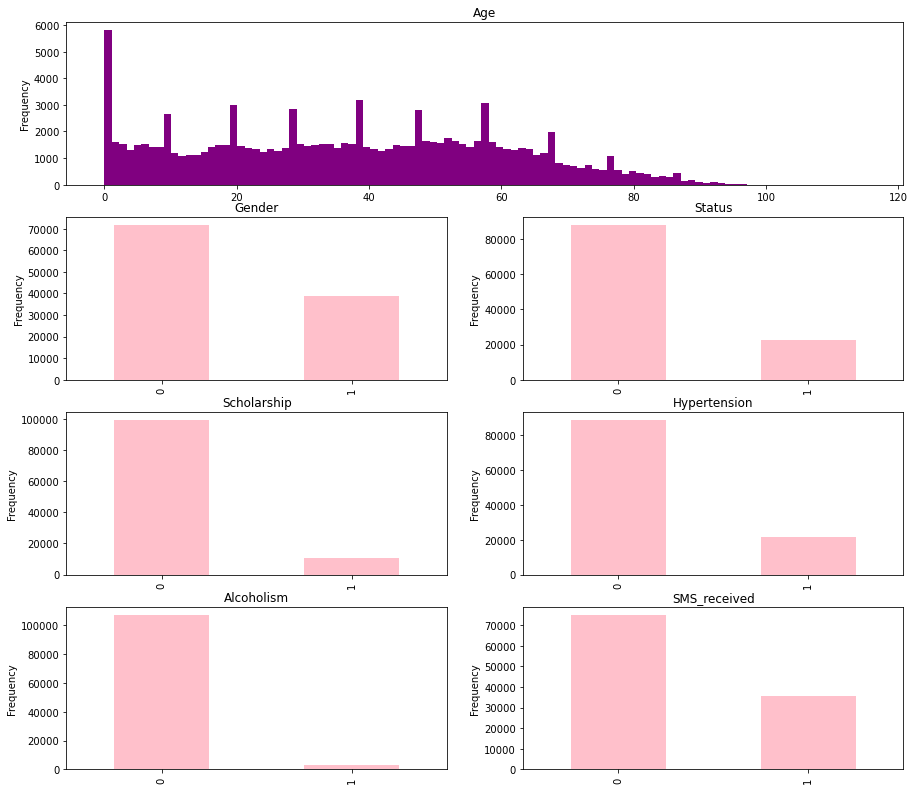

In [14]:
# post data wrangling
discrete_vars = ['Gender' , 'Status' , 'Scholarship' , 'Hypertension', 'Alcoholism' , 'SMS_received']
features_plots(discrete_vars)

Text(0, 0.5, 'Frequency')

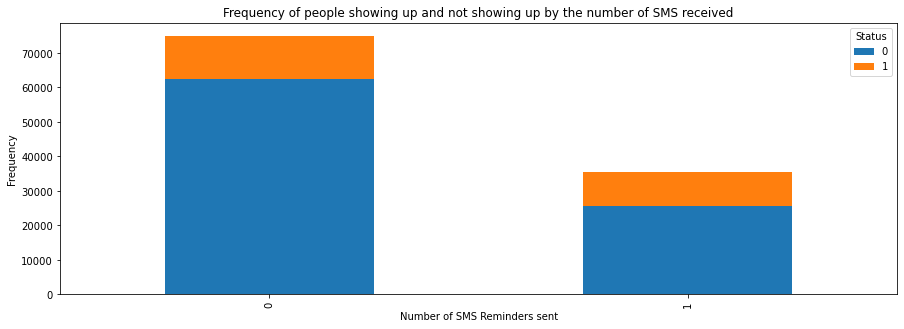

In [15]:
# Let's look for the plots of SMS received and No-Show.Looking at these plots we may say that there may be some relations that lies 
# between whether or not reminder SMS is received by patients and their visits at scheduled appointment dates.

# Effect on the status of patient reaching at scheduled appointment dates on the basis of SMS received or not
data_dow_status = data.groupby(['SMS_received','Status'])['SMS_received'].count().unstack('Status').fillna(0)
data_dow_status[[0,1]].plot(kind = 'bar',stacked = True)
plt.title('Frequency of people showing up and not showing up by the number of SMS received')
plt.xlabel('Number of SMS Reminders sent')
plt.ylabel('Frequency')

As we may see that those people that didn't receive reminder messages come up on their appointment dates were around 16% while those that receive messages and come up on their scheduled appoinment were 21%.To conclude,we may say that SMS Reminders do marginally increase the likelihood of the patients showing up on their scheduled appointment dates.

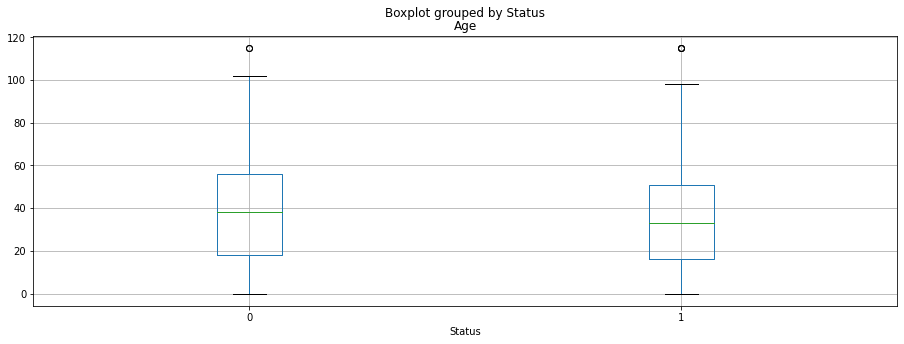

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text major ticklabel objects>)

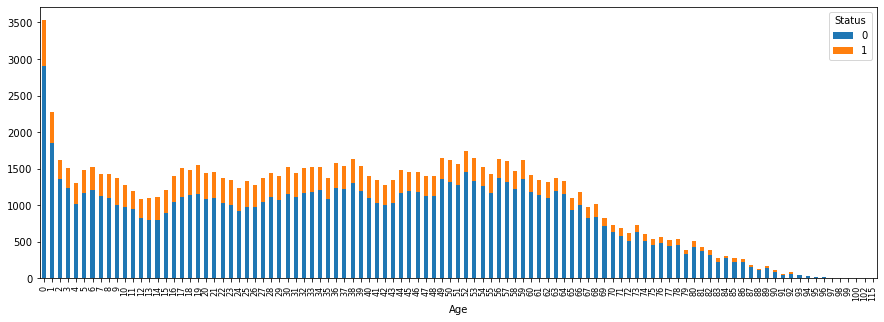

In [16]:
# Next,we try to compare Age with Status. We may hypothesize that the persons showing up at their scheduled appointment dates 
# may belong to lesser age group or most probably working for a job who had fixed time slots thereby they remember to visit the
# clinic on time while the older ones are likely to be dependent on some other and thereby may miss their appointments if their 
# care takers are not serious enough towards them.

# Plotting box plot of patient's age by status
data.boxplot(column = ['Age'] , return_type = 'axes' , by = 'Status')
plt.show()

# Plotting stacked bar graph showing Age and Status relationships
data_dow_status_2 = data.groupby(['Age','Status'])['Age'].count().unstack('Status').fillna(0)
data_dow_status_2[[0,1]].plot(kind = 'bar',stacked = True)
plt.xticks(size = 8,rotation = 90)

Look at the trends the median age of the people not showing up at their scheduled appointment dates is 39 yrs while those showing up had a median age of around 34 yrs which is less than the one's showing up thereby, proving our hypothesis.

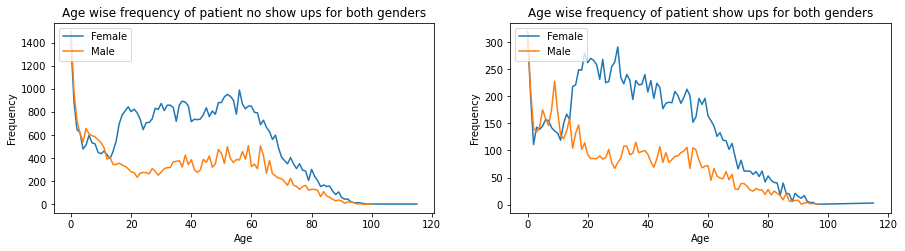

In [17]:
# Plotting line graph plot age by gender for patient status-wise
plt.figure(figsize = (15,3.5))

for i,status in enumerate(['no show ups' , 'show ups']):
    
    data_show = data[data['Status'] == i]
    plt.subplot(1 , 2 , i+1)
    
    for gender in [0,1] :
        data_gender = data_show[data_show['Gender'] == gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()
        
    plt.title('Age wise frequency of patient %s for both genders' %status)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')

## Feature Exploration
#### Greater the number of observations and feature sets within the dataset, the greater the likelihood that the model will capture the variability within it.Increasing observation is not an option but we may try to split the already existing features and then explore them .

In [18]:
# breaking data features into data components
for index, component in enumerate(['year', 'month', 'day']):
    data['%s_%s'%('AppointmentDay', component)] = data['AppointmentDay'].apply(lambda x: int(x.split('T')[0].split('-')[index]))

for index, component in enumerate(['hour', 'min', 'sec']):
        data['%s_%s'%('ScheduledDay' , component)] = data['ScheduledDay'].apply(lambda x: int(x.split('T')[1][:-1].split(':')[index]))

data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Status,AppointmentDay_year,AppointmentDay_month,AppointmentDay_day,ScheduledDay_hour,ScheduledDay_min,ScheduledDay_sec
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,2016,4,29,18,38,8
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,2016,4,29,16,8,27
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,2016,4,29,16,19,4
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,2016,4,29,17,29,31
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,2016,4,29,16,7,23


In [19]:
# creating new column that will denote the weekday name termed as Day_Name
data['Date'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')
data['Day_Name'] = data.Date.dt.strftime("%A")

Text(0, 0.5, 'Frequency')

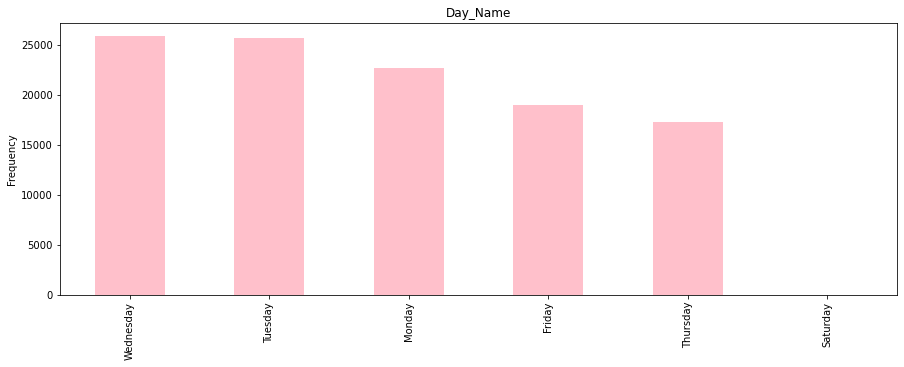

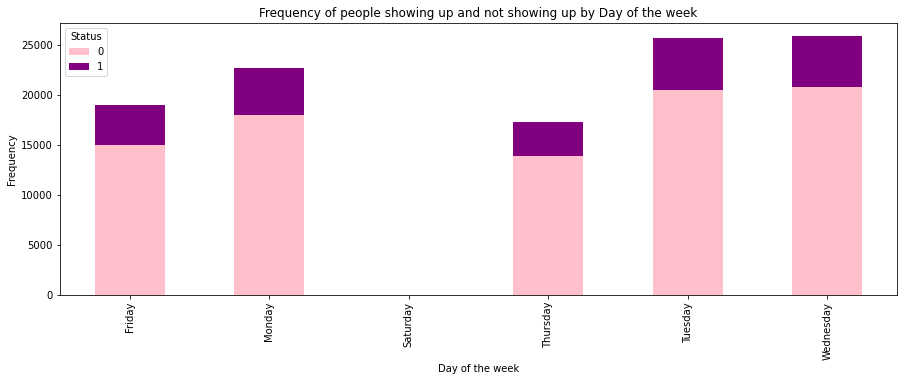

In [20]:
# doing some plot analysis to relate weekday with other parameters in the dataset

# Feature Plot representation 
for i,dv in enumerate(['Day_Name']) :
    data[dv].value_counts().plot(kind = 'bar' , title = dv , color = 'pink')
    plt.ylabel('Frequency')
    
# Frequency of People showing up or not by day of week
data_dow_status_2 = data.groupby(['Day_Name', 'Status'])['Day_Name'].count().unstack('Status').fillna(0)
pal = ["pink","purple"]
data_dow_status_2[[0, 1]].plot(kind='bar', stacked=True , color = pal)
plt.title('Frequency of people showing up and not showing up by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">
From these plots, we may infer that most of the people prefer to visit clinic in the first half of the week, suggesting a need to monitor that whether or not enough staff and resources are available for these days and if not try to manage that such that the clinic didn't suffer from any more loses due to any of such flaws.
From the above all mentioned exploratory analysis,we may conclude the reasons or instances because of which recurring losses are observed such as at particular weekdays such as thursday and friday we may minimize staff and resources as less people prefer to visit clinic etc. 

<p style="color:light red;font-size:18px;font-family:serif;text-align:left;">But, that couldn't be great if we may be able to predict whether or not the patient will show up on the appointment day thereby : - Scaling down human resources (i.e., staff and doctors) to cut  costs. - Determine the reasons for patients not showing up and find fixes for that problem. This all is possible using classification analysis , so let's look for this more.</p>


## Classification Analysis

<p style="color = black;font-size:18px;font-family:serif;text-align:left;">
Classification helps us decide which of the given classes a new observation will fall into. Classification comes under supervised learning where the model can only be trained 
once a membership labeled data is provided as an input. These membership variables are usually categorical variables which can be nominal as well as Boolean in nature.</p>

<p style="color = black;font-size:18px;font-family:serif;text-align:left;">
The following methods can be used to evaluate a classification model:
• <b>Accuracy</b>: Classifier and predictor accuracy
• <b>Speed</b>: Time to train and predict from the model
• <b>Robustness</b>: Handling missing values and noise
• <b>Scalability</b>: Efficiency in disk-related databases
• <b>Interpretability</b>: Predictions made by the model make intuitive sense</p>

In [21]:
# declaring a function to detect Model's Accuracy 
def model_performance(model_name, X_train, y_train, y_test, Y_pred):
    print('Model name: %s'%model_name)
    print('Accuracy Score : %f'%metrics.accuracy_score(y_test, Y_pred))
    print('Train accuracy: %f'% clf.score(X_train, y_train))
    print('Recall Score: %f'%recall_score(y_test, Y_pred , average = 'micro'))
    print('F1 Score: %f'%f1_score(y_test , Y_pred , average = 'micro'))

In [22]:
# converting day_name string to integer data type in order to maintain homogenity in the dataset such that model could be 
# trained  efficiently
dow_mapping = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}
data['Day_Name'] = data['Day_Name'].map(dow_mapping)

for index, component in enumerate(['year', 'month', 'day']):
    data['%s_%s'%('ScheduledDay', component)] = data['ScheduledDay'].apply(lambda x: int(x.split('T')[0].split('-')[index]))
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'SMS_received', 'Status', 'AppointmentDay_year',
       'AppointmentDay_month', 'AppointmentDay_day', 'ScheduledDay_hour',
       'ScheduledDay_min', 'ScheduledDay_sec', 'Date', 'Day_Name',
       'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_day'],
      dtype='object')

In [23]:
# Declaring features for model training and splitting data into training and test dataset
features = [u'Gender', u'Age', 'Scholarship', 'Hypertension', 'Diabetes','Alcoholism', 'SMS_received','AppointmentDay_month', 'AppointmentDay_day', 'ScheduledDay_hour', 'ScheduledDay_min', 'ScheduledDay_sec', 'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_day','Day_Name']
x = np.array(data[features])
y = np.array(data['Status'])
x_train,x_test= train_test_split(x, test_size=0.3)
y_train,y_test = train_test_split(y, test_size=0.3)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
# On Applying Decision Tree Classifier, this may be an appropiate classifier to start with since, 
# the visual representation of the problem looks like a tree with status as a parent node and with two children nodes,one 
# that will show up and other that won't show up at the appointment dates
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
model_performance('Decision Tree' , x_train , y_train , y_test ,y_pred)

Model name: Decision Tree
Accuracy Score : 0.662977
Train accuracy: 0.998449
Recall Score: 0.662977
F1 Score: 0.662977


In [25]:
#Still we may look for some better model predictions let's dive more deep into certain other classification algorithms
#After researching about few classification algorithms , i came to the conclusion as shown below:

## Stochastic Gradient Descent 

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">Stochastic Gradient Descent Optimizer tries to find the minimum for a function. The function of interest, in this case, is the loss/error function(the difference between actual and ideal value). We want to minimize the error, and therefore we use the SGD optimizer.</p>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">  
The SGD optimizer works iteratively by moving in the direction of the gradient. The direction of the minimum is in the direction where the values are decreasing. Thus, this is computed using gradients.</p>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">
A visual representation of the Stochastic Gradient Descent Optimizer is given below.</p>

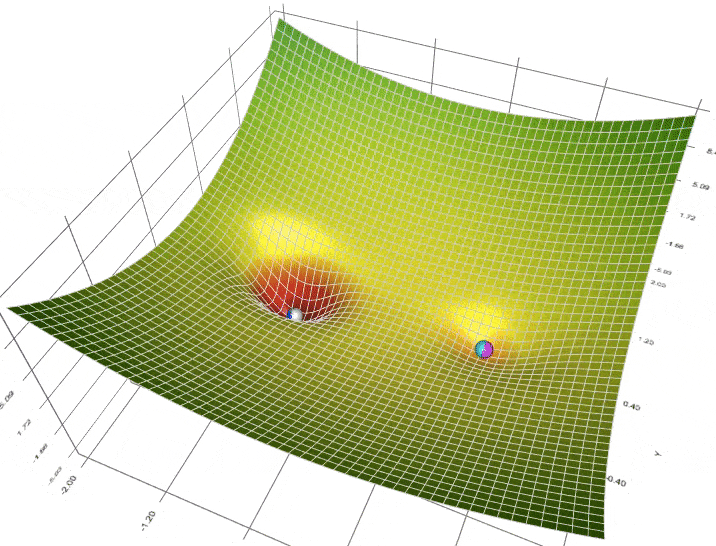

In [26]:
Image("https://www.section.io/engineering-education/sgd-classifier/SGD.gif")

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left"> 
Observe the balls rolling into the low-lying areas. The low-lying regions represent the minima. Sometimes, there might be two minima of varying sizes. The pink and the blue balls land up in the smaller minima, called the local minima, whereas the other three balls end up in the deeper minima, called the global minima.This is a problem associated with SGD.</p>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">
Sometimes, we might end up obtaining the minimum of a loss function at the local minimum. This leads to an inefficient modeling of the loss function, thereby leading to a decrease inaccuracy.</p>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left"><b>The speed with which the balls travel is analogous to the learning rate, that is used later. Sufficient iterations of SGD are applied to tackle and nullify the problem of local minima.</b></p>
More Information : https://www.section.io/engineering-education/sgd-classifier/

In [78]:
# Training the model by applying kernel approximation with SGD Classifier
rbf_feature = kernel_approximation.RBFSampler(gamma=1, random_state=1)
X_train = rbf_feature.fit_transform(x_train)

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">Kernel approximation performs non-linear transformations of the input to make it suitable for linear classification and other algorithms. This is better than kernel trick as it can significantly reduce the cost of learning with very large datasets. The combination  of kernel map approximations with SGD classifier can make non-linear learning on large datasets possible.</p>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">In SGD classifier, the gradient of the loss is updated one sample at a time, and the model is updated with respect to the learning rate. In order for the model to give the best results on default learning rate, the data should have zero mean and unit variance.This algorithm works best with data which is represented as sparse arrays of floating point values for features within the dataset. Loss parameter controls the model it fits, which is Linear Support Vector Machine (SVM) by default.</p>


In [74]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [75]:
# Predicting dataset and applying model performance analysis function
X_test = rbf_feature.fit_transform(x_test)
Y_pred = clf.predict(X_test)
model_performance('Kernel approximation with SGD', X_train, y_train, y_test, Y_pred)

Model name: Kernel approximation with SGD
Accuracy Score : 0.798631
Train accuracy: 0.797823
Recall Score: 0.798631
F1 Score: 0.798631


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left">
On applying the various classifiers , we may say that kernel approximation with SGD Classifier(high improvement from 66% to 79.78% accuracy) is best for this dataset as per the present analysis.</p>
<p style= "font-family:Georgia;color:dark green;font-size:120%;text-align:left">    
<b>Thereby, we may conclude that by means of the SGD Classifier model had the power to predict in real time if a patient who had booked an appointment would or would not show up on the day of his/her appointment.</b></p>